In [74]:
# %%
import cv2
import matplotlib.pyplot as plt
import os
def path(_path):
    return os.path.join(os.getcwd(), _path)

image = cv2.imread(path('1.jpg'), 1)

In [75]:
# %%
print('width: %d' % image.shape[1])
print('heigth: %d' % image.shape[0])
print('chnnels: %d' % image.shape[2])


width: 1280
heigth: 720
chnnels: 3


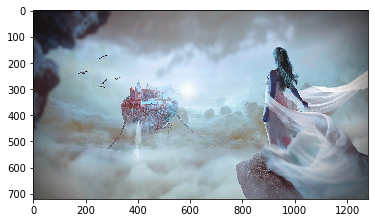

In [76]:
# %%
plt.imshow(image) # 显示的模式是rgb，所以显示上与原图存在差异
# %%


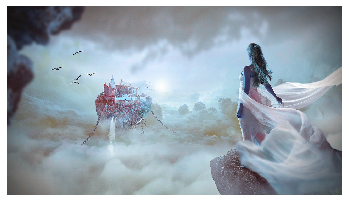

In [77]:
plt.axis('off')
#plt.show()
plt.imshow(image)

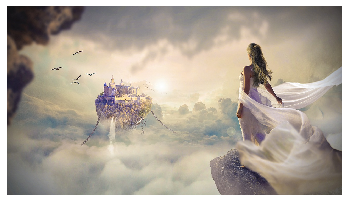

In [78]:
image2 = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.axis('off')
#plt.show()
plt.imshow(image2)

In [79]:
cv2.imwrite('new_i.jpg',image)# 保存的是原图

True

In [80]:
cv2.imwrite('new_2.jpg',image2)

True

In [81]:
# 取图片的shape:宽，高，通道

In [82]:
h,w,c = image2.shape
print('宽：%d Pixels,高：%s Pixels，通道：%s Pixels' % (w, h, c))

宽：1280 Pixels,高：720 Pixels，通道：3 Pixels


In [83]:
b, g, r = image[0, 0] # 原生cv
print('r:%s, g:%s, b:%s' % (r,g,b))
r, g, b = image2[0 ,0]# 转换之后的cv
print('r:%s, g:%s, b:%s' % (r,g,b))

r:22, g:20, b:21
r:22, g:20, b:21


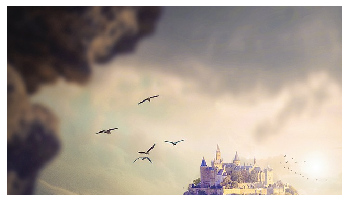

In [84]:
cX, cY = w//2, h//2 # 找图像中心
plt.axis('off')
# 左上角
plt.imshow(image2[0:cY, 0:cX]) #图像是一个关于hxw的矩阵

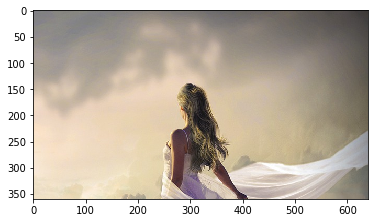

In [85]:
# 右上角
plt.imshow(image2[0:cY, cX:w])

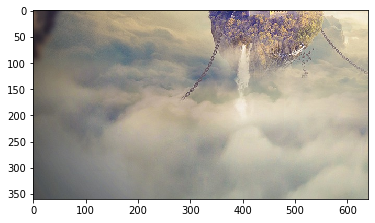

In [86]:
# 左下角
plt.imshow(image2[cY:h, 0:cX])

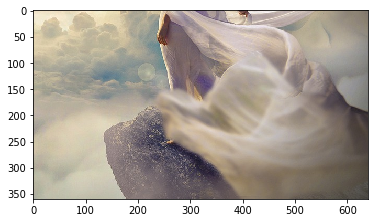

In [87]:
# 右下角
plt.imshow(image2[cY:h, cX:w])

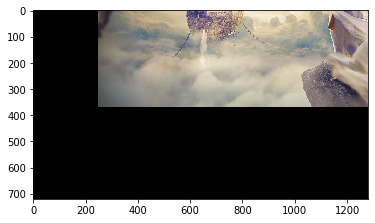

In [88]:
import numpy as np
m = np.float32([[1,0,250],[0,1,-350]]) # 横向移动往右250px,纵向移动往上350px 
shifted = cv2.warpAffine(image2, m, (image2.shape[1],image2.shape[0]))
plt.imshow(shifted)

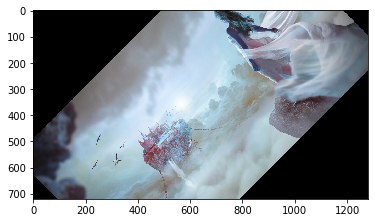

In [89]:
h, w = image2.shape[:2]
cX, cY = w//2, h//2
# 参数(cX, xY)标记旋转中心点，45标记逆时针旋转45度（-45标记顺时针）。1.0标记缩放或者放大背书
m = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
new_image = cv2.warpAffine(image, m, (w, h))
plt.imshow(new_image)

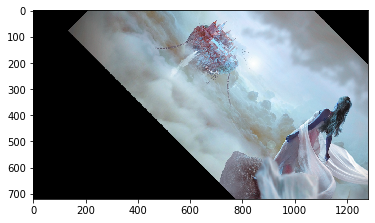

In [90]:
m = cv2.getRotationMatrix2D((cX+200, cY+200), -45, 1.0)
new_image = cv2.warpAffine(image, m, (w, h))
plt.imshow(new_image)

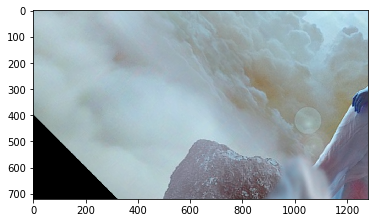

In [91]:
m = cv2.getRotationMatrix2D((cX+200, cY+200), -45, 3.0)
new_image = cv2.warpAffine(image, m, (w, h))
plt.imshow(new_image)

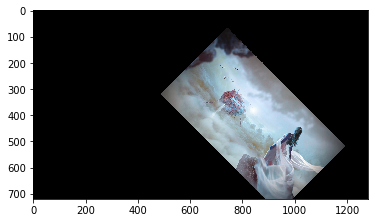

In [92]:
m = cv2.getRotationMatrix2D((cX+200, cY+200), -45, 0.5)
new_image = cv2.warpAffine(image, m, (w, h))
plt.imshow(new_image)

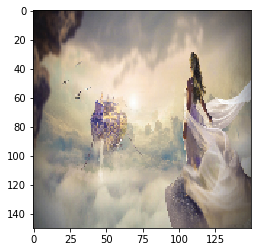

In [93]:
# 图片大小改变
width, height = 150, 150
# 暴力改变大小
plt.imshow(cv2.resize(image2, (width, height)))

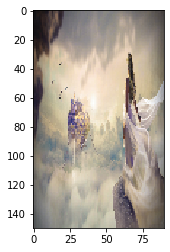

In [94]:
# 图片大小改变
width, height = 90, 150
# 暴力改变大小
plt.imshow(cv2.resize(image2, (width, height)))

(84, 150)


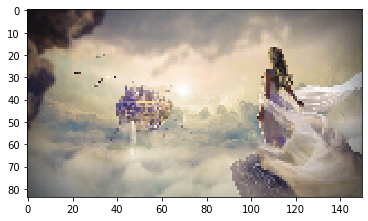

In [95]:
# 等比例改变

def ratio_resize(width, interpolation=cv2.INTER_NEAREST):
    height = int(width*image2.shape[0]/image2.shape[1])
    # interpolation 有五种算法：最邻近(INTER_NEAREST)，双线性(INTER_LINEAR),基于像素区域的(INTER_AREA),立方插值(INTER_CUBIC),兰索斯插值(INTER_LANCZOS4)
    _new_image = cv2.resize(image2, (width, height),interpolation=interpolation) 
    plt.imshow(_new_image)
    print(_new_image.shape[:2])
    
ratio_resize(150)

(45, 80)


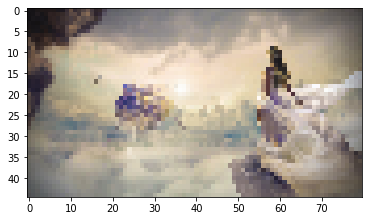

In [96]:
ratio_resize(80, cv2.INTER_LINEAR)